In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
def create_df(size : int, sdv : float, displacement : np.ndarray = None):
    return (np.random.normal(scale = sdv, size = (size, 2)) + displacement)

In [144]:
size_s1 = 120
size_s2 = 120
sdv_s1 = 1
sdv_s2 = 1
print(f"We will create the first group of size {size_s1} and standard deviation {sdv_s1}")
print(f"We will create the first group of size {size_s2} and standard deviation {sdv_s2}")

We will create the first group of size 120 and standard deviation 1
We will create the first group of size 120 and standard deviation 1


In [145]:
m1 = create_df(size = size_s1, sdv = sdv_s1, displacement = np.array([1, 1]))
m2 = create_df(size = size_s2, sdv = sdv_s2, displacement = np.array([2, 2]))

In [146]:
def plot_graphic(*args, test_points: bool = False, simple_plot: bool = False, labels: bool = False):
    cmap = plt.get_cmap("plasma")
    
    # Generate colors based on the number of args
    if test_points:
        num_colors = len(args) - 1  # One less for test points
    else:
        num_colors = len(args)
    
    colors = [cmap(i / num_colors) for i in range(num_colors)]
    
    if simple_plot:
        for i, matrix in enumerate(args):
            if test_points == True and i == len(args) - 1:
                # Handle test points
                if labels == True:
                    for j in range(matrix.shape[0]):
                        if matrix[j, 2] == 1:
                            plt.scatter(matrix[j, 0], matrix[j, 1], color=colors[0], s=100)
                        else:
                            plt.scatter(matrix[j, 0], matrix[j, 1], color=colors[1], s=100)
                else:
                    plt.scatter(matrix[:, 0], matrix[:, 1], color="black", s=100, label = "test data")
            else:
                plt.scatter(matrix[:, 0], matrix[:, 1], color=colors[i], label=f'Dataset {i + 1}')

        plt.title("Points of Dataset")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.legend()
        plt.show()


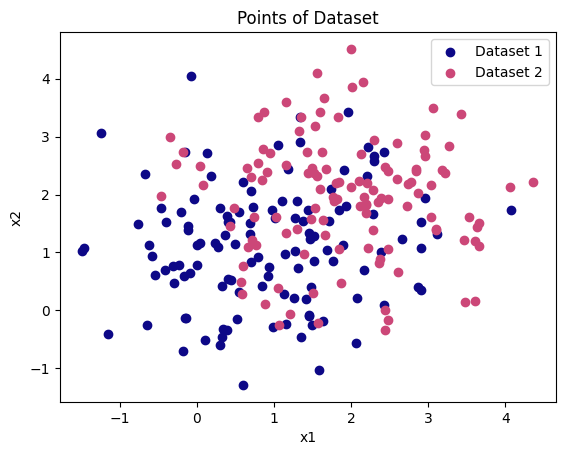

In [147]:
plot_graphic(m1, m2, simple_plot = True)

In [148]:
l1 = np.ones(shape = (size_s1, 1))
l2 = -1*np.ones(shape = (size_s2, 1))

print("Now we will concatenate the labels with my matrix of values.")

def concatenate_x(*args):
    return np.concatenate([matrix for i, matrix in enumerate(args)], axis = 0)
    
matrix = concatenate_x(m1, m2)

labels = concatenate_x(l1, l2)

def concatenate_y(*args):
    return np.concatenate([labels for i, labels in enumerate(args)], axis = 1)
    
matrix = concatenate_y(matrix, labels)

Now we will concatenate the labels with my matrix of values.


In [149]:
matrix_df = pd.DataFrame(data = matrix, columns = ["x1", "x2", "labels"])
matrix_df

,x1,x2,labels
0,-0.146768,2.733981,1.0
1,0.693932,1.507287,1.0
2,2.202319,2.315713,1.0
3,0.361827,1.298339,1.0
4,-1.482060,1.026915,1.0
...,...,...,...
235,2.206713,2.206289,-1.0
236,1.677308,2.445519,-1.0
237,1.850205,1.057642,-1.0
238,2.443883,-0.340533,-1.0


In [150]:
matrix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      240 non-null    float64
 1   x2      240 non-null    float64
 2   labels  240 non-null    float64
dtypes: float64(3)
memory usage: 5.8 KB


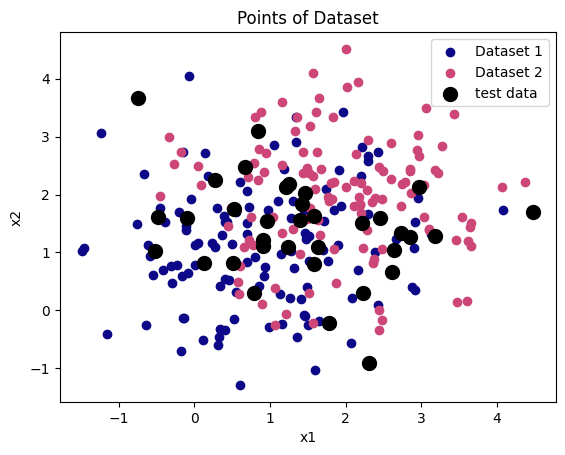

In [151]:
new_points = create_df(size = 35, sdv = 1, displacement = np.array(object = [1.5, 1.5]))
plot_graphic(m1, m2, new_points, simple_plot = True, test_points = True)

In [ ]:
def gaussian_kernel(distance, bandwidth=1.0):
    return np.exp(- (distance ** 2) / (2 * bandwidth ** 2)) / math.sqrt(2 * math.pi)

In [152]:
def knn(matrix: np.ndarray, new_points: np.ndarray, K: int = None) -> dict:
    if K is None or K <= 0 or K/2 == 0:
        raise ValueError("The K value must be a positive integer and odd.")
    
    dic = {}
    count = 0

    for point in new_points:
        count += 1
        # Calculate the Euclidean distance between the point and all points in the matrix
        distances = np.linalg.norm(matrix[:, [0, 1]] - point, axis=1)
        
        # Find the indices of the K nearest neighbors
        nearest_indices = np.argsort(distances)[:K]
        
        # Sum the labels (column 2) of the nearest neighbors
        sum_labels = np.sum(matrix[nearest_indices, 2])
        
        # Assign label based on the sum of the nearest neighbors' labels
        dic[f"Points {count}"] = 1 if sum_labels > 0 else -1

    return dic

# Example usage
dic_ret = knn(matrix=matrix, new_points=new_points, K=3)

In [153]:
for index, key in enumerate(dic_ret):
    value = dic_ret[key]
    print(f"{key} : {value}")

Points 1 : 1
Points 2 : 1
Points 3 : 1
Points 4 : 1
Points 5 : 1
Points 6 : 1
Points 7 : -1
Points 8 : 1
Points 9 : 1
Points 10 : -1
Points 11 : 1
Points 12 : -1
Points 13 : -1
Points 14 : 1
Points 15 : 1
Points 16 : 1
Points 17 : -1
Points 18 : 1
Points 19 : 1
Points 20 : -1
Points 21 : 1
Points 22 : 1
Points 23 : -1
Points 24 : 1
Points 25 : -1
Points 26 : 1
Points 27 : 1
Points 28 : -1
Points 29 : -1
Points 30 : -1
Points 31 : 1
Points 32 : 1
Points 33 : 1
Points 34 : -1
Points 35 : -1


In [154]:
val = np.array(list(dic_ret.values())).reshape(-1, 1)
new_points = concatenate_y(new_points, val)

print(f"After the concatenation, the new shape of new_points is {new_points.shape}")

After the concatenation, the new shape of new_points is (35, 3)


In [155]:
final_matrix = concatenate_x(matrix, new_points)

In [156]:
m1_ = concatenate_y(m1, l1)
m2_ = concatenate_y(m2, l2)

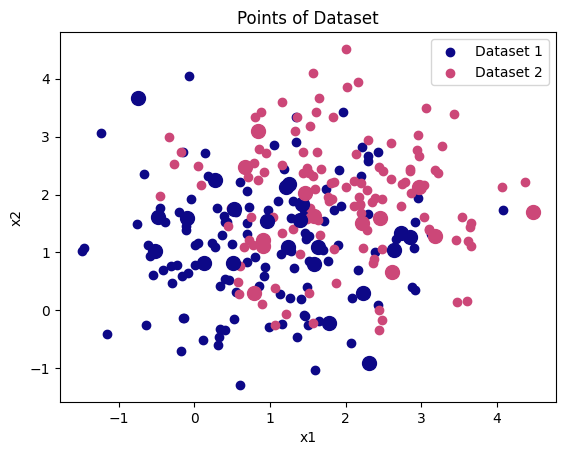

In [157]:
plot_graphic(m1_, m2_, new_points, simple_plot = True, test_points = True, labels = True)

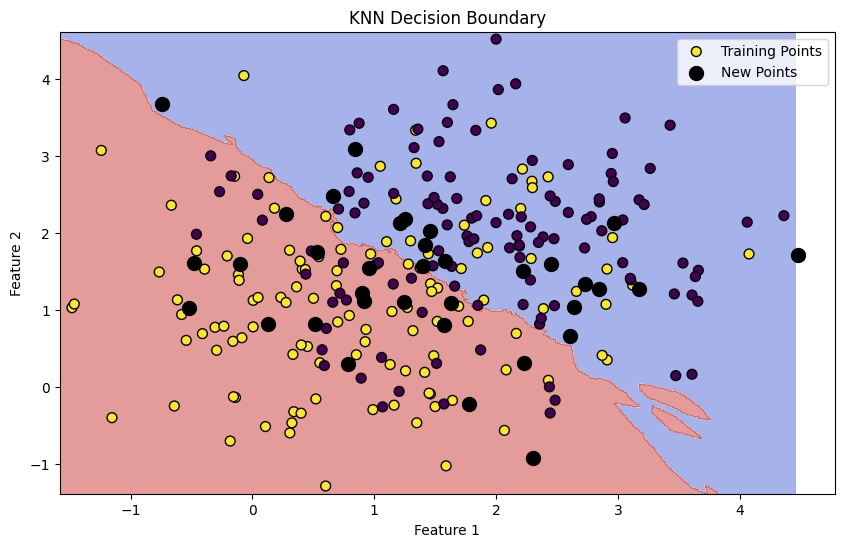

In [161]:
def plot_knn_decision_boundary(matrix: np.ndarray, new_points: np.ndarray, K: int):
    # Create a mesh grid for plotting the decision boundary
    x_min, x_max = matrix[:, 0].min() - 0.1, matrix[:, 0].max() + 0.1
    y_min, y_max = matrix[:, 1].min() - 0.1, matrix[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Flatten the grid to pass to knn for classification
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Classify each point on the grid using the KNN function
    grid_predictions = knn(matrix, grid_points, K)

    # Reshape predictions back to the grid shape
    Z = np.array([grid_predictions[f"Points {i + 1}"] for i in range(len(grid_predictions))]).reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')  # Plot decision boundary
    plt.scatter(matrix[:, 0], matrix[:, 1], c=matrix[:, 2], edgecolor='k', s=50, label='Training Points')  # Plot training points
    plt.scatter(new_points[:, 0], new_points[:, 1], color='black', s=100, label='New Points')  # Plot new points
    plt.title("KNN Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Example Usage
# Generate some example data
#size_s1, size_s2 = 120, 120
#matrix1 = np.hstack((np.random.rand(size_s1, 1) * 0.5, np.random.rand(size_s1, 1) * 0.5) +)
#labels1 = np.ones((size_s1, 1))
#group1 = np.hstack((matrix1, labels1))

#matrix2 = np.hstack((np.random.rand(size_s2, 1) * 0.5 + 0.5, np.random.rand(size_s2, 1) * 0.5))
#labels2 = -np.ones((size_s2, 1))
#group2 = np.hstack((matrix2, labels2))

# Combine the two groups into one matrix
#matrix = np.vstack((group1, group2))

# New points for classification
#new_points = np.random.rand(10, 2)

# Call the plotting function
plot_knn_decision_boundary(matrix = matrix, new_points = new_points, K = 51)